# TITLE: Vector Low Pass Tracking Filter
# AUTHOR: Samuel Law
## DATE: 04/24/2022
---

In [1]:
%reset -f

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
count = 500
step_change = np.ones(count)
step_change[:100] = 0
m, s = 0, 0.4
noise = np.random.normal(m, s, count)
signal = (step_change + noise)*5

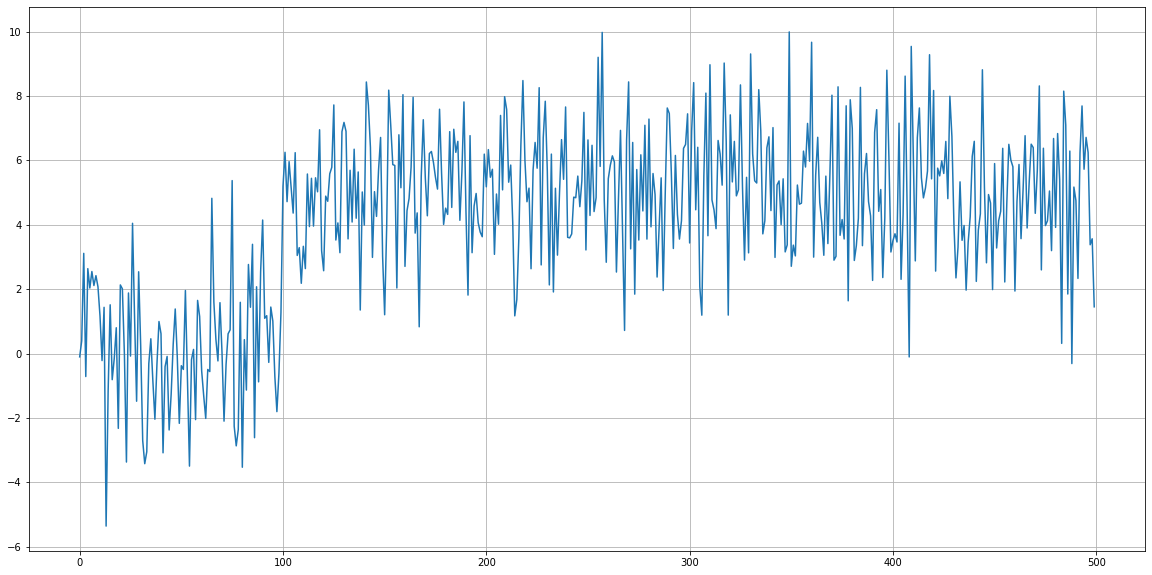

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(signal)
ax.grid();

2.2061183576985464 1.602140537555088 0.6039778201434585


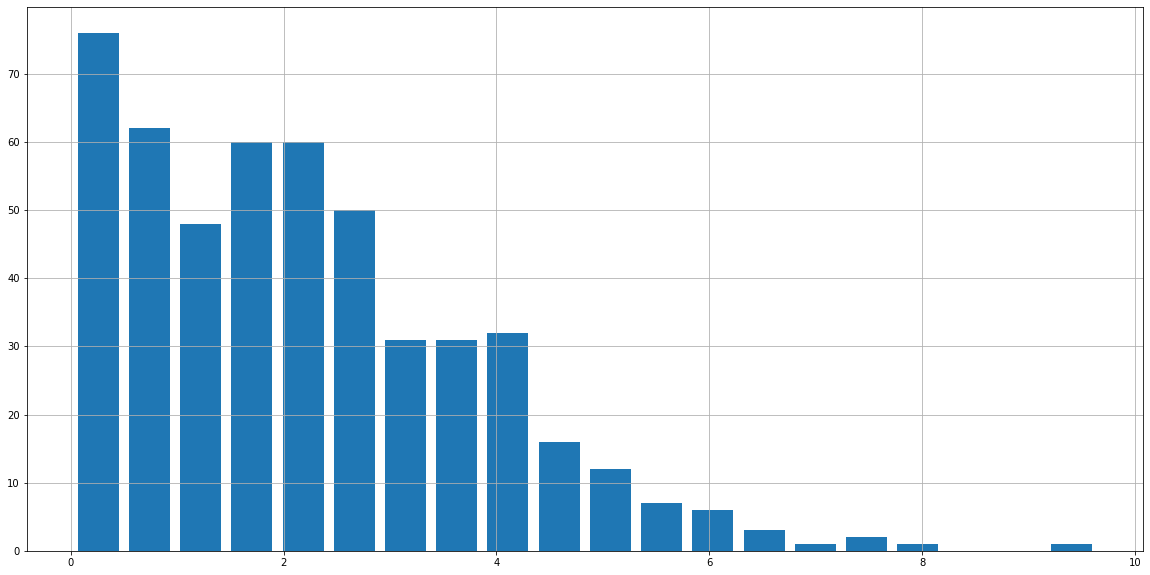

In [14]:
dy = abs(np.diff(signal))
m, s = dy.mean(), dy.std()
print(m, s, m-s)
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(dy, 20, rwidth=0.80)
ax.grid();

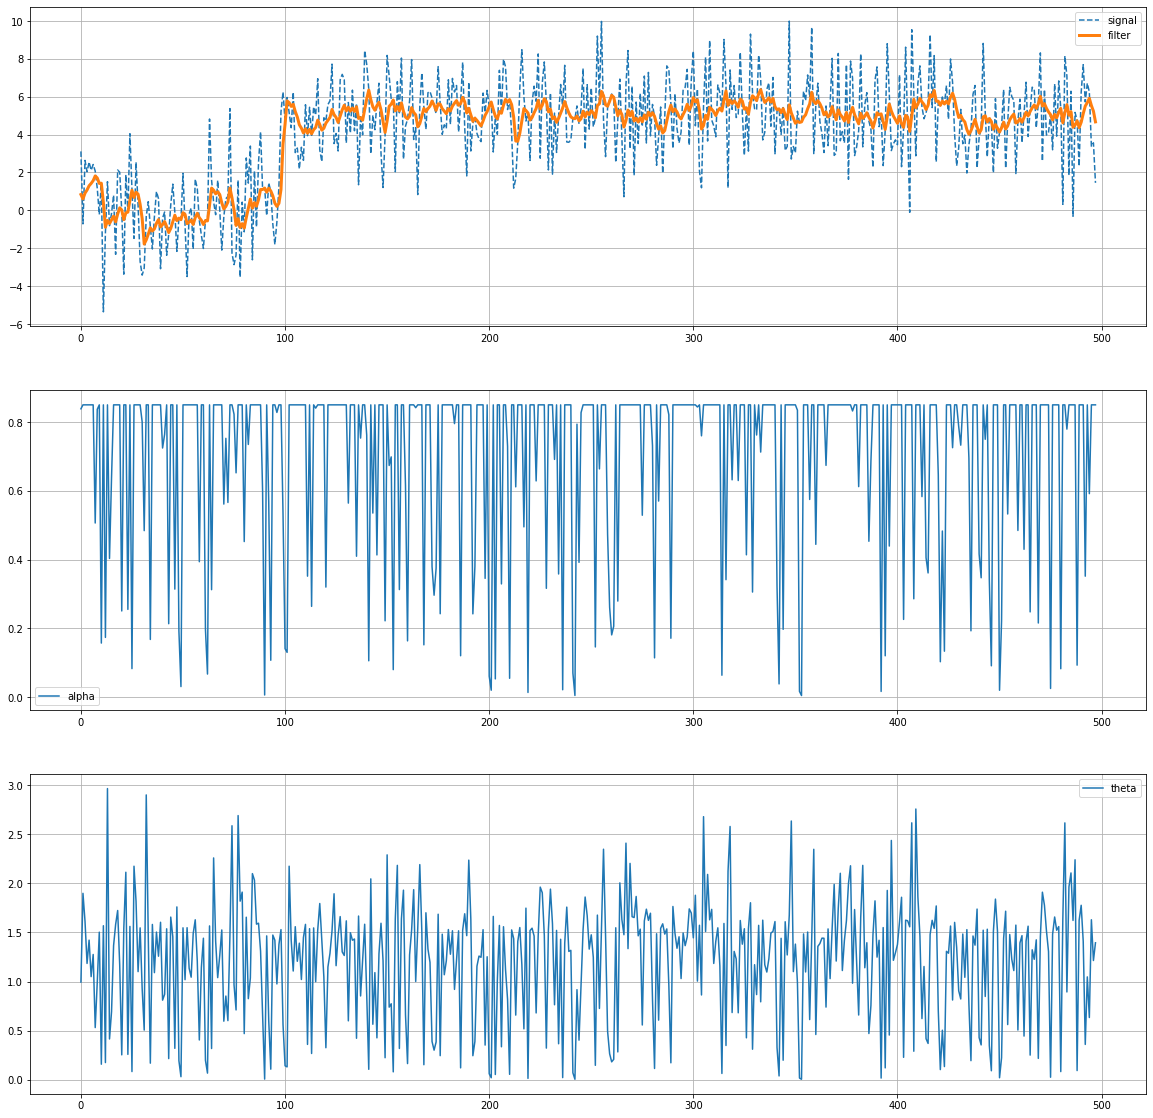

In [27]:
y_last_last = signal[0]
y_last = signal[1]

c = m-s
b = 2.5
high_limit = np.arcsin(0.85)

filter_out = []
theta_out = []
alpha_out = []
for sv in signal[2:]:
    v1 = np.array([1, y_last - y_last_last])
    v2 = np.array([1, sv - y_last])
    v1[1] = np.sign(v1[1]) * ((abs(v1[1])/c)**b)
    v2[1] = np.sign(v2[1]) * ((abs(v2[1])/c)**b)
    theta = np.arccos(v1.dot(v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))
    phi = high_limit if theta > high_limit else theta

    alpha = np.sin(phi)
    y_new = (y_last*alpha) + (sv)*(1-alpha)

    y_last_last = y_last
    y_last = y_new

    filter_out.append(y_new)
    theta_out.append(theta)
    alpha_out.append(alpha)

fig, ax = plt.subplots(nrows=3, figsize=(20, 20))
ax[0].plot(signal[2:], '--', label='signal')
ax[0].plot(filter_out, '-', linewidth=3, label='filter')
ax[1].plot(alpha_out, '-', label='alpha')
ax[2].plot(theta_out, '-', label='theta')
[a.grid() for a in ax]
[a.legend() for a in ax];

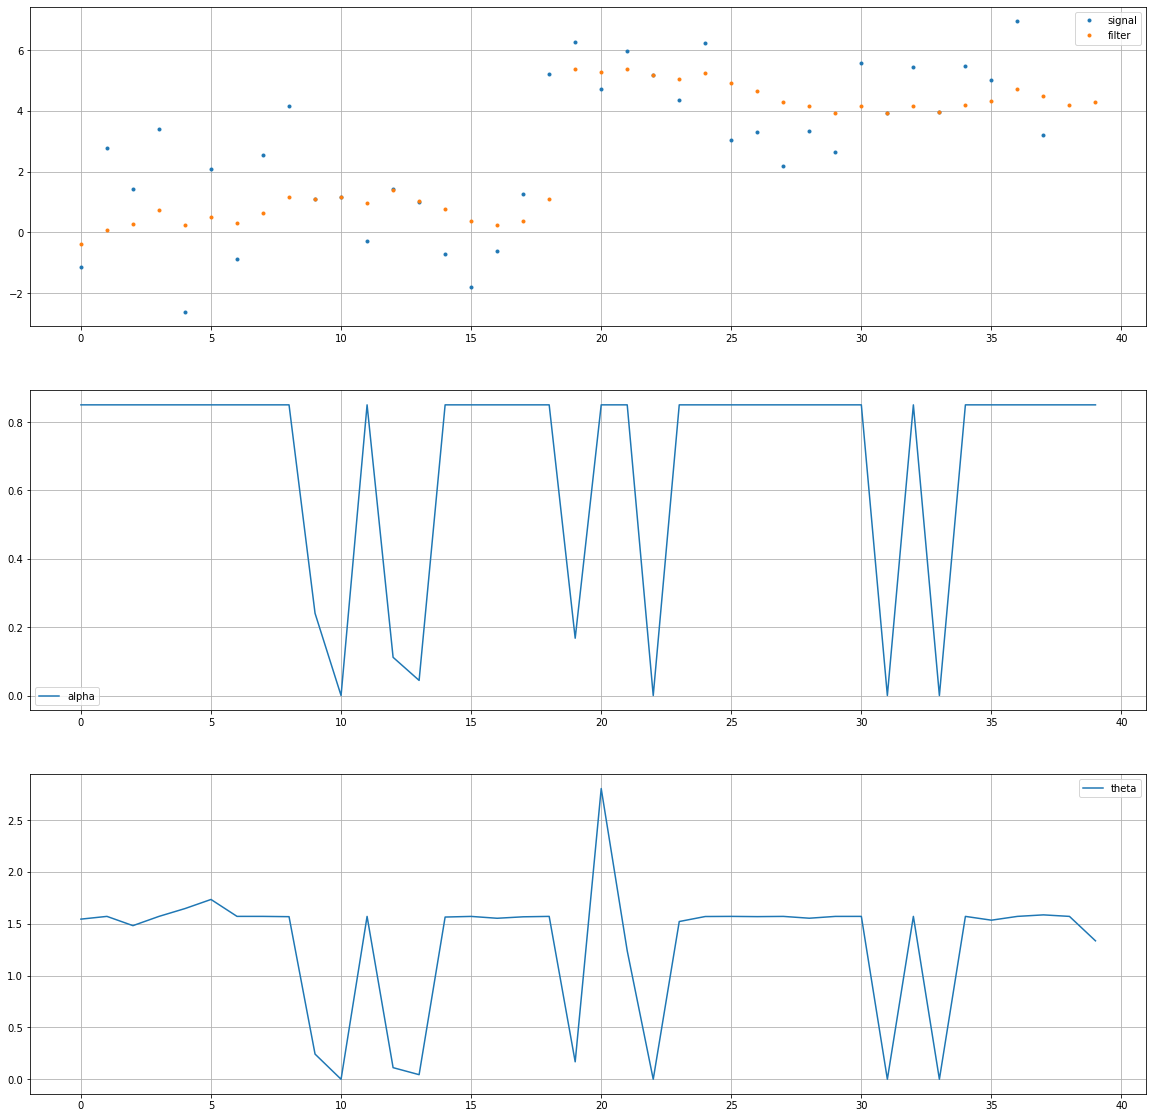

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 20))
ax[0].plot(signal[82:120], '.', label='signal')
ax[0].plot(filter_out[80:120], '.', label='filter')
ax[1].plot(alpha_out[80:120], '-', label='alpha')
ax[2].plot(theta_out[80:120], '-', label='theta')
[a.grid() for a in ax]
[a.legend() for a in ax];